**Build a Fully Connected Neural Network (FCNN) for Gene Expression Classification [2pt]:**

Begin by loading the dynamic gene expression data from gene_expression_data.csv, which comprises
1000 samples, each featuring 10 genes across 20 time steps with normalized expression levels.
Your task is to develop an FCNN that can classify gene expression dynamics into two distinct
classes as indicated by the 'outcome' column in the dataset—'1' for upregulation and '0' for
downregulation. After loading the dataset, divide it into training and testing sets, maintaining a
test size of 20%. Design your FCNN to include two dense layers and embark on the training
process for a duration of 30 epochs.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten
from keras import regularizers
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('gene_expression_data.csv')
X = data.iloc[:, data.columns != 'Outcome'].values
y = data.iloc[:, data.columns == 'Outcome'].values
X = X.reshape(1000, 20, 10)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build the FCNN model
model = Sequential()
model.add(Flatten(input_shape=(20, 10)))
model.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.L2(0.01)))
# model.add(BatchNormalization())
model.add(Dropout(0.2))
# model.add(Dense(units=50, activation='relu',kernel_regularizer=regularizers.L2(0.01)))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/30
7/7 [==============================] - 0s 12ms/step - loss: 1.4552 - accuracy: 0.5775 - val_loss: 1.3855 - val_accuracy: 0.6350
Epoch 2/30
7/7 [==============================] - 0s 2ms/step - loss: 1.3528 - accuracy: 0.6438 - val_loss: 1.3000 - val_accuracy: 0.6850
Epoch 3/30
7/7 [==============================] - 0s 3ms/step - loss: 1.2549 - accuracy: 0.7038 - val_loss: 1.2245 - val_accuracy: 0.7400
Epoch 4/30
7/7 [==============================] - 0s 2ms/step - loss: 1.1620 - accuracy: 0.7600 - val_loss: 1.1591 - val_accuracy: 0.7750
Epoch 5/30
7/7 [==============================] - 0s 2ms/step - loss: 1.0863 - accuracy: 0.7713 - val_loss: 1.1004 - val_accuracy: 0.7850
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 1.0250 - accuracy: 0.8000 - val_loss: 1.0475 - val_accuracy: 0.7750
Epoch 7/30
7/7 [==============================] - 0s 3ms/step - loss: 0.9662 - accuracy: 0.8012 - val_loss: 1.0005 - val_accuracy: 0.7850
Epoch 8/30
7/7 [=================

**Model Performance Evaluation and Analysis [2pt]:**

Evaluate your FCNN's performance by
examining the training and testing accuracy and loss. Use history and plots functions to capture
and visualize these metrics and provide an analysis of your findings. Discuss any observed issues
with the training or testing results and suggest applicable techniques from our coursework to
address them. Justify your choice of techniques.

**The FCNN model yielded an average testing and validation accuracy of about 0.86 and 0.79 respectively. The training and validation losses were 0.72 and 0.80 respectively. The plots of the training and validation accuracies and losses over each epoch demonstrate similar training and validation progression, indicative of the lack of overfitting. However, this was only achieved after the implementation of L2 regularization and a Dropout layer. Prior to these adjustments, the training loss demonstrated the expected monotonic decrease while the training loss flattened and then began increasing in the later epochs. This odd pattern is representative of overfitting., To address this, I implemented L2 regularization and a Dropout layer. The L2 regularization can help with overfitting because it tries to minimize weight values to small, non-zero values in order to prevent overfitting on a few features. Since we are dealing with vastly complex gene networks, it is more likely that there is multicollinearity and most features are important to consider, so L2 is preferable over L1. I also implemented a Dropout layer in order to further decrease overfitting because by witholding some gene expression data at each timepoint, the model is more likely to disperse feature weights appropriately.**

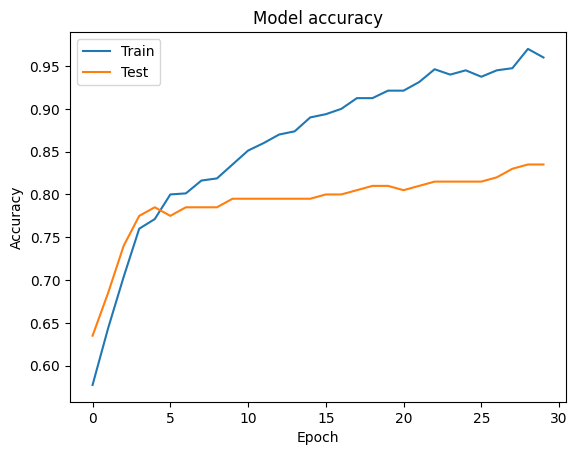

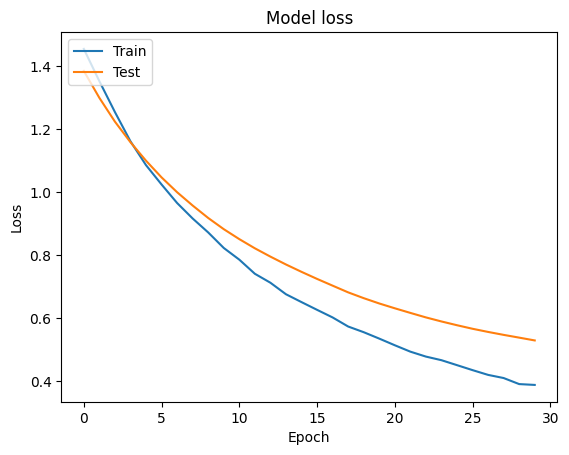

Average testing accuracy: 0.8618749996026357
Average validation accuracy: 0.7913333376248678
Average testing loss: 0.727955824136734
Average validation loss: 0.8051263769467671


In [3]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Summary statistics
print('Average testing accuracy: ' + str(np.mean(history.history['accuracy'])))
print('Average validation accuracy: ' + str(np.mean(history.history['val_accuracy'])))
print('Average testing loss: ' + str(np.mean(history.history['loss'])))
print('Average validation loss: ' + str(np.mean(history.history['val_loss'])))

**LSTM Model for Temporal Gene Expression Classification [2pt]:**

Shift focus to predicting gene
expression dynamics by developing an LSTM model that captures temporal dependencies. Load
and preprocess the dataset to match the LSTM's expected input shape (num_samples,
num_time_steps, num_genes), basing your reshaping on the provided column names, and keep
a test size of 20%. Design the LSTM for binary classification, embarking on a training process for
a duration of 30 epochs with the goal of surpassing a test accuracy of 0.8. You can start with
LSTM’s units=50

In [4]:
from keras.layers import LSTM
from tensorflow.keras.metrics import Precision, Recall, AUC

In [5]:
data = pd.read_csv("gene_expression_data.csv")
X = data.iloc[:, data.columns != 'Outcome'].values
y = data.iloc[:, data.columns == 'Outcome'].values
X = X.reshape(1000, 20, 10)
X.shape, y.shape

((1000, 20, 10), (1000, 1))

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

model = Sequential()
model.add(LSTM(50, input_shape=(20, 10)))  
model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/30
13/13 [==============================] - 1s 21ms/step - loss: 0.6735 - accuracy: 0.6675 - val_loss: 0.6338 - val_accuracy: 0.7650
Epoch 2/30
13/13 [==============================] - 0s 6ms/step - loss: 0.6005 - accuracy: 0.7600 - val_loss: 0.5359 - val_accuracy: 0.7700
Epoch 3/30
13/13 [==============================] - 0s 6ms/step - loss: 0.5437 - accuracy: 0.7613 - val_loss: 0.5244 - val_accuracy: 0.7700
Epoch 4/30
13/13 [==============================] - 0s 6ms/step - loss: 0.5271 - accuracy: 0.7613 - val_loss: 0.5079 - val_accuracy: 0.7700
Epoch 5/30
13/13 [==============================] - 0s 6ms/step - loss: 0.5083 - accuracy: 0.7613 - val_loss: 0.4788 - val_accuracy: 0.7700
Epoch 6/30
13/13 [==============================] - 0s 6ms/step - loss: 0.4640 - accuracy: 0.7638 - val_loss: 0.4304 - val_accuracy: 0.7900
Epoch 7/30
13/13 [==============================] - 0s 5ms/step - loss: 0.4130 - accuracy: 0.8087 - val_loss: 0.4052 - val_accuracy: 0.8300
Epoch 8/30
13/13 [=

**LSTM Model Evaluation and FCNN Comparison [2pt]:**

Post-training, evaluate your LSTM model as you do for the Q2. Provide an analysis of the LSTM's results, comparing its performance
against the FCNN. Conclude by discussing the implications of your findings and draw conclusions
on the effectiveness of LSTM models in capturing temporal gene expression dynamics versus
FCNN

**The LSTM model yielded an average testing and validation accuracy of about 0.83 and 0.82 respectively. The training and validation losses were 0.34 and 0.47 respectively. The plots of the training and validation accuracies and losses over each epoch demonstrate similar training and validation progression, indicative of the lack of overfitting. However, this was only achieved after increasing the batch size from 16 to 64. Increasing the batch size may have addressed overfitting because increasing the number of samples used in each training step means that there is quicker convergence and thus less opportunities to overfit on the data. The downside of this approach is that larger batch sizes typically sacrifice the final validation accuracy compared to other approaches to overcoming overfitting such as regularization and dropout. Nonetheless, increasing the batch size was a rather quick and simple fix without increasing the complexity of the model. The performance of the LSTM appears to be superior to that of the FCNN, demonstrating both higher training and validation accuracy and lower training and validation loss. These findings show that LSTM may be better suited to capturing the temporal relationships of gene expression data because it utilizes the saved weights from a previous iteration to inform the training of the current iteration in the model.**

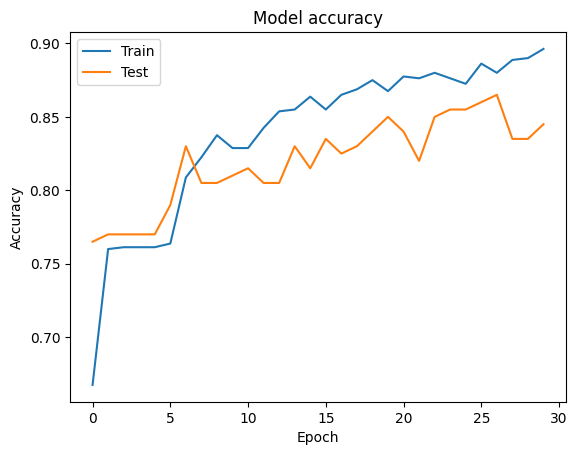

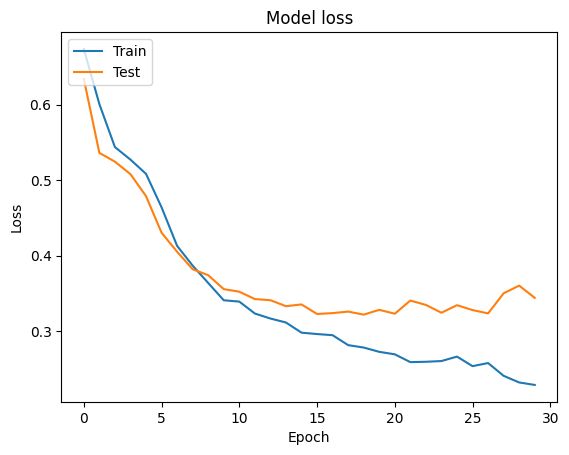

Average testing accuracy: 0.8390416701634725
Average validation accuracy: 0.8198333303133647
Average testing loss: 0.3455350225170453
Average validation loss: 0.3773909648259481


In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Summary statistics 
print('Average testing accuracy: ' + str(np.mean(history.history['accuracy'])))
print('Average validation accuracy: ' + str(np.mean(history.history['val_accuracy'])))
print('Average testing loss: ' + str(np.mean(history.history['loss'])))
print('Average validation loss: ' + str(np.mean(history.history['val_loss'])))